In [3]:
import pandas as pd

# Load the dataset# Load the dataset
df = pd.read_csv(r'C:\Users\manis\OneDrive\Desktop\PROJECTS\PRODIGY\Prodigy_2\Mall_Customers.csv')


In [4]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:

# Display the first few rows of the dataframe
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:

# Print the column names
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv(r'C:\Users\manis\OneDrive\Desktop\PROJECTS\PRODIGY\Prodigy_2\Mall_Customers.csv')

# Assuming 'Annual Income (k$)' and 'Spending Score (1-100)' are relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the first few rows of the scaled features
print(X_scaled[:5])


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

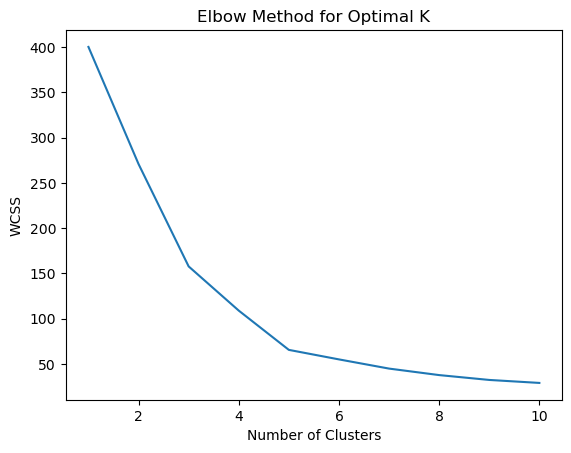

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)


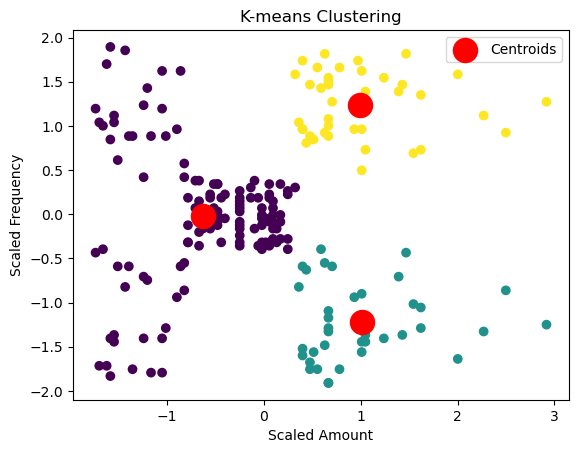

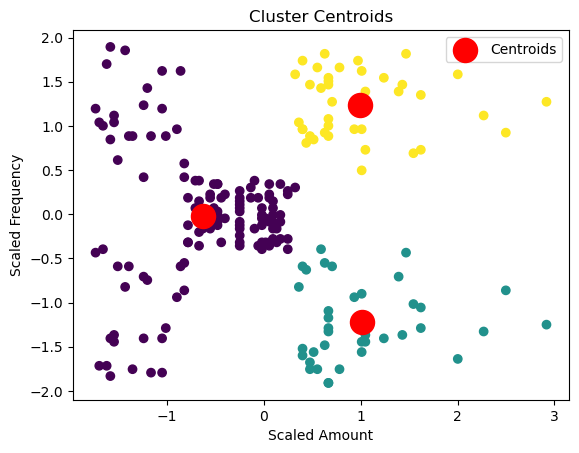

In [14]:
# Scatter plot of clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Frequency')
plt.title('K-means Clustering')
plt.legend()
plt.show()

# Plotting cluster centroids
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Frequency')
plt.title('Cluster Centroids')
plt.legend()
plt.show()


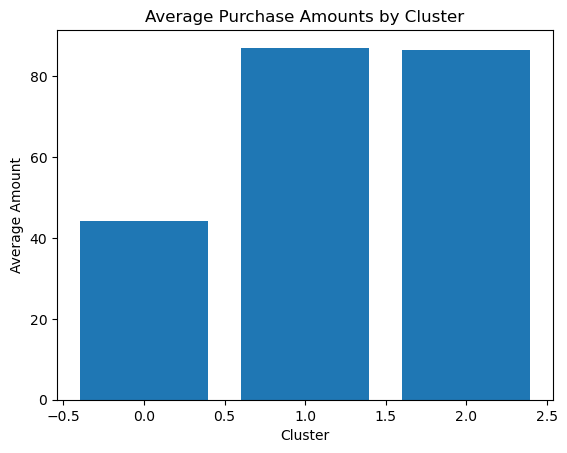

In [16]:
# Add cluster labels to original data
cluster_data = pd.DataFrame(X)
cluster_data['Cluster'] = cluster_labels

# Calculate average purchase amounts by cluster
cluster_means = cluster_data.groupby('Cluster').mean()

# Plot average purchase amounts by cluster
plt.bar(cluster_means.index, cluster_means['Annual Income (k$)'])
plt.xlabel('Cluster')
plt.ylabel('Average Amount')
plt.title('Average Purchase Amounts by Cluster')
plt.show()


In [21]:
# Assuming kmeans is your KMeans model and labels are the cluster labels assigned
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the 'Cluster' column to your DataFrame
df['Cluster'] = labels


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


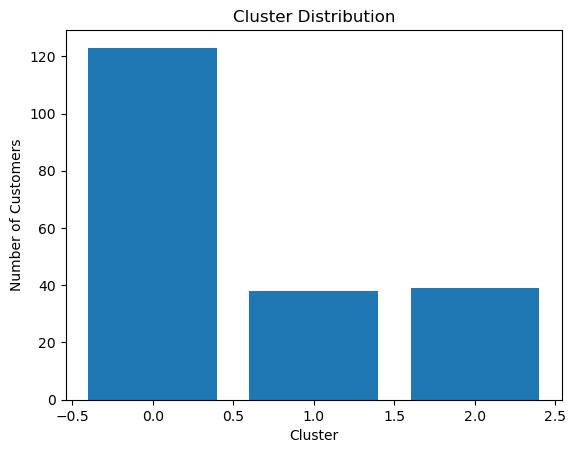

In [22]:
import matplotlib.pyplot as plt

# Count the number of data points in each cluster
cluster_counts = df.groupby('Cluster')['CustomerID'].count()

# Plot cluster distribution
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')
plt.show()


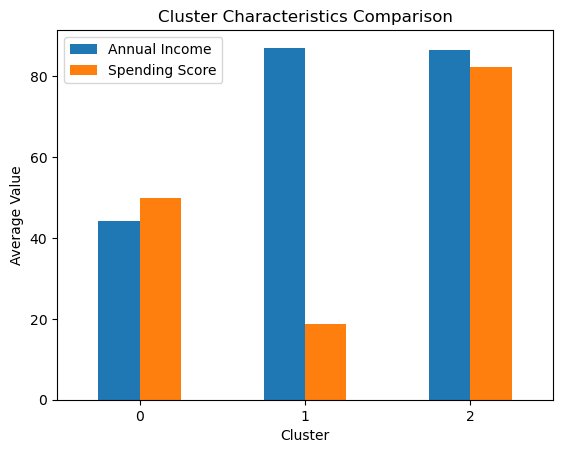

In [23]:
# Calculate average 'Annual Income' and 'Spending Score' by cluster
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Plot cluster characteristics comparison
cluster_means.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Cluster Characteristics Comparison')
plt.legend(['Annual Income', 'Spending Score'])
plt.xticks(rotation=0)
plt.show()


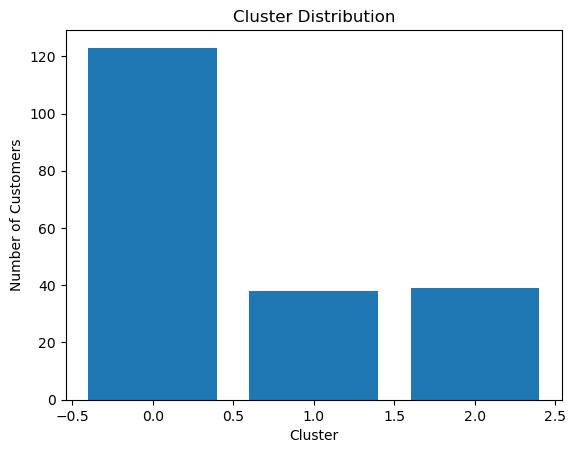

In [24]:
import matplotlib.pyplot as plt

# Count the number of data points in each cluster
cluster_counts = df.groupby('Cluster')['CustomerID'].count()

# Plot cluster distribution
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')
plt.show()


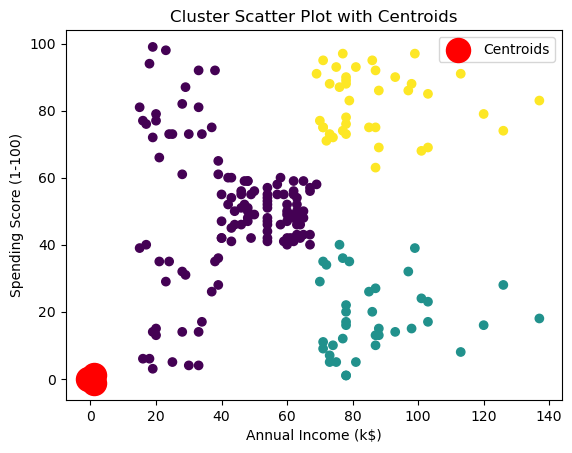

In [25]:
# Plot cluster scatter plot with centroids
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Scatter Plot with Centroids')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Calculate silhouette scores
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)


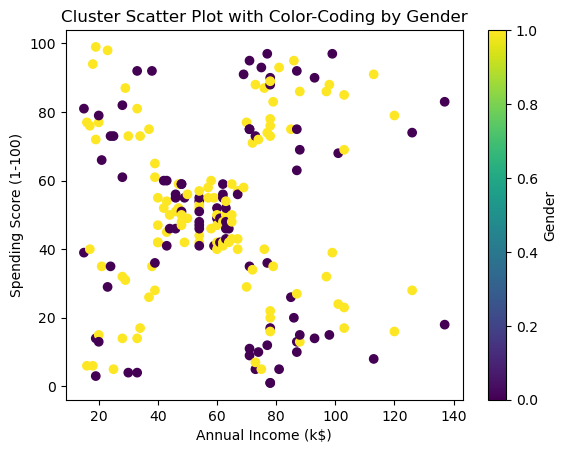

In [27]:
import matplotlib.pyplot as plt

# Plot cluster scatter plot with color-coding by gender
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Gender'].map({'Male': 0, 'Female': 1}), cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Scatter Plot with Color-Coding by Gender')
plt.colorbar(label='Gender')
plt.show()


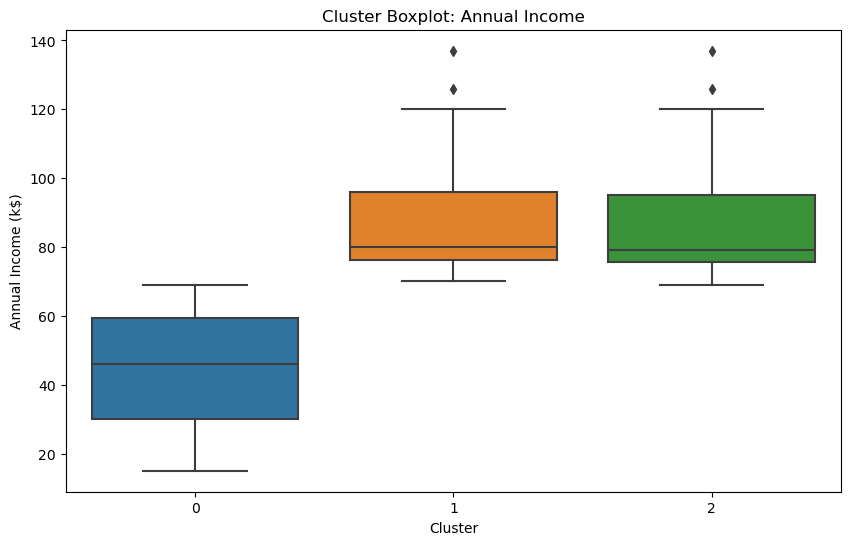

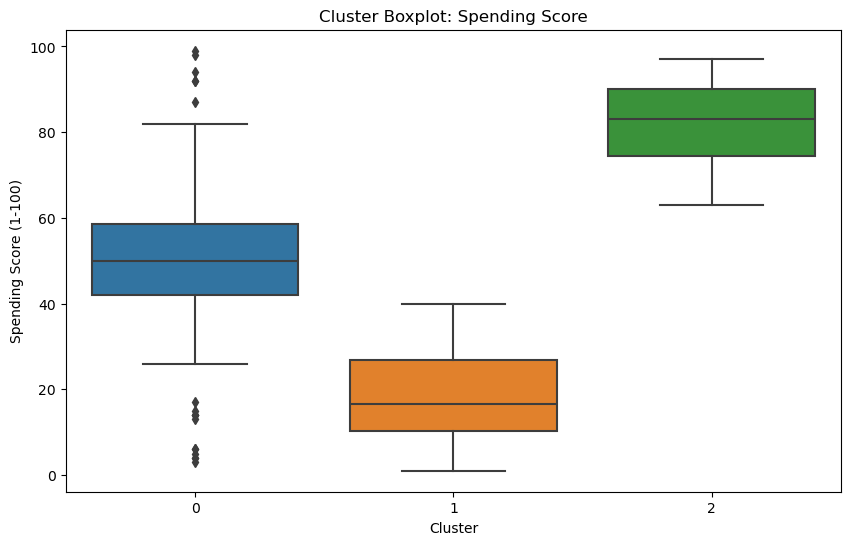

In [28]:
import seaborn as sns

# Plot cluster boxplot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.title('Cluster Boxplot: Annual Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Boxplot: Spending Score')
plt.show()


C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


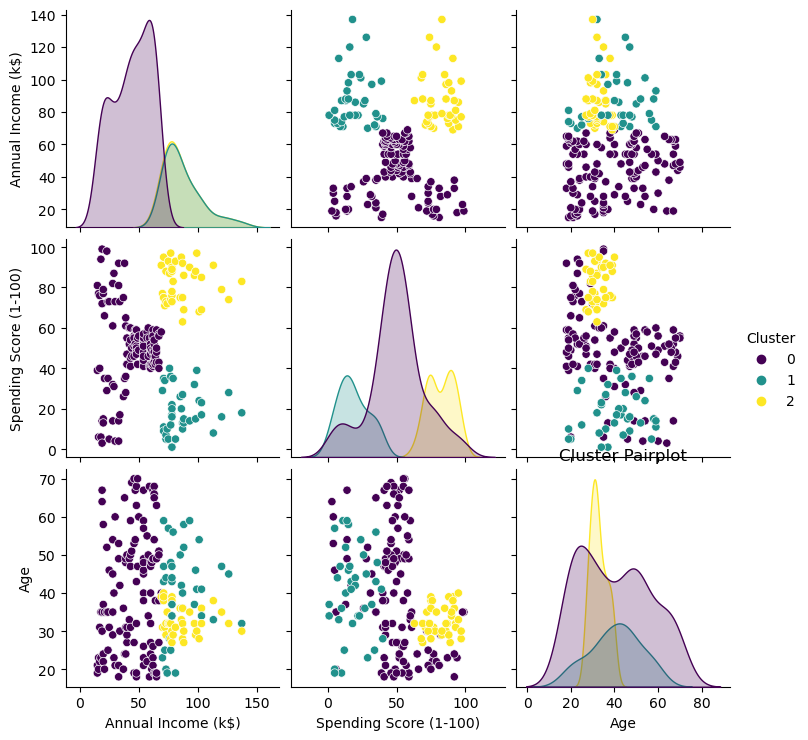

In [29]:
import seaborn as sns

# Plot cluster pairplot
sns.pairplot(df, hue='Cluster', vars=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'], palette='viridis')
plt.title('Cluster Pairplot')
plt.show()


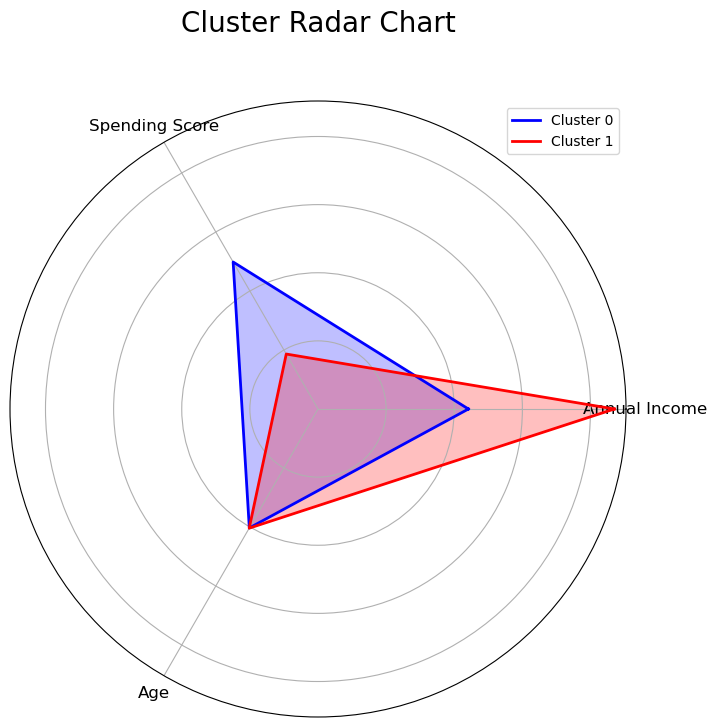

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate average feature values by cluster
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()

# Plot cluster radar chart
labels = np.array(['Annual Income', 'Spending Score', 'Age'])
stats_cluster_0 = cluster_means.loc[cluster_means.index[0]].values
stats_cluster_0 = np.concatenate((stats_cluster_0, [stats_cluster_0[0]]))  # Close the loop
stats_cluster_1 = cluster_means.loc[cluster_means.index[1]].values
stats_cluster_1 = np.concatenate((stats_cluster_1, [stats_cluster_1[0]]))  # Close the loop

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Add the first angle at the end to close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats_cluster_0, color='b', alpha=0.25)
ax.plot(angles, stats_cluster_0, color='b', linewidth=2, label='Cluster 0')
ax.fill(angles, stats_cluster_1, color='r', alpha=0.25)
ax.plot(angles, stats_cluster_1, color='r', linewidth=2, label='Cluster 1')

ax.set_yticklabels([])
plt.xticks(angles[:-1], labels, color='black', size=12)
plt.title('Cluster Radar Chart', size=20, color='black', y=1.1)
plt.legend()
plt.show()
